# Affinity propagation

In [3]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

## Data Creation

In [14]:
centers = [[1,1],[-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

In [5]:
import matplotlib.pyplot as plt
from itertools import cycle

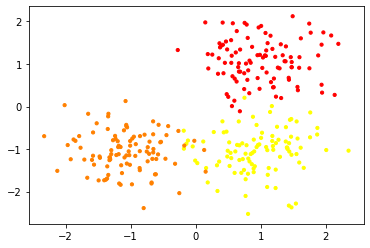

In [6]:
plt.scatter(X[:,0], X[:,1], c = labels, s = 10, cmap="autumn")

In [7]:
af = AffinityPropagation(preference=-50).fit(X)

In [9]:
cluster_center_ids = af.cluster_centers_indices_ # Of those 300 samples, which will be the 3 centers

In [11]:
labels = af.labels_

In [13]:
n_cluster = len(cluster_center_ids)
n_cluster 

3

In [21]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference=-50).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    clust_labels = af.labels_
    n_cluster = len(cluster_center_ids)

    print("Estimated number of clusters: {}".format(n_cluster))
    print("Homogeneity: {}".format(metrics.homogeneity_score(labels, clust_labels)))
    print("Completeness: {}".format(metrics.completeness_score(labels, clust_labels)))
    print("V-measure: {}".format(metrics.v_measure_score(labels, clust_labels)))
    print("Adjusted R2 {}".format(metrics.adjusted_rand_score(labels, clust_labels)))
    print("Adjusted mutual information: {}".format(metrics.adjusted_mutual_info_score(labels, clust_labels)))
    print("Silhouette coefficient: {}".format(metrics.silhouette_score(X, labels, metric="sqeuclidean")))

    plt.figure(figsize=(16,9))
    plt.clf()

    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmykbgrcmyk")
    for k, color in zip(range(n_cluster), colors):
        class_members = (clust_labels == k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], color + '.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor = color, markeredgecolor = "k", markersize = 14)
        for x in X[class_members]:
            plt.plot([clust_center[0], x[0]], [clust_center[1], x[1]], color = color)
    plt.title("Estimated number of clusters")
    plt.show()

Estimated number of clusters: 3
Homogeneity: 0.8715595298385134
Completeness: 0.8715859753374195
V-measure: 0.8715727523873623
Adjusted R2 0.9119626080431966
Adjusted mutual information: 0.8707815164449694
Silhouette coefficient: 0.7349507512551584


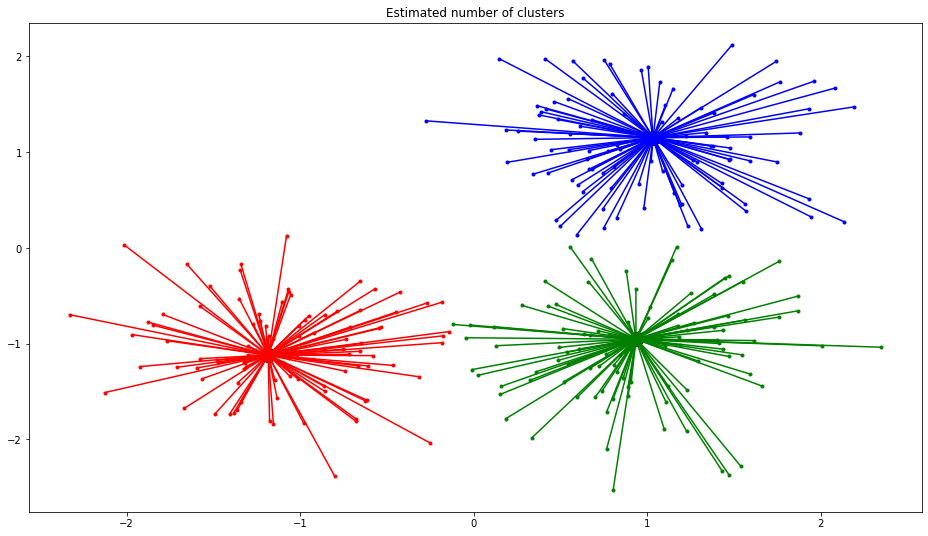

In [22]:
report_affinity_propagation(X)